In [46]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
import numpy as np

import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FlipFlopGenerator, ContinuousPeaksGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner
from mlrose_hiive import GeomDecay, ArithDecay, ExpDecay

In [47]:
problem_name = "Max K Color"
problem = MaxKColorGenerator().generate(seed=27, number_of_nodes=100, max_connections_per_node=3, max_colors=3)

## Randomized Hill Climbing

In [48]:
rhc = RHCRunner(problem=problem,
              experiment_name='rhc_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              restart_list=[0,2,8])

# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

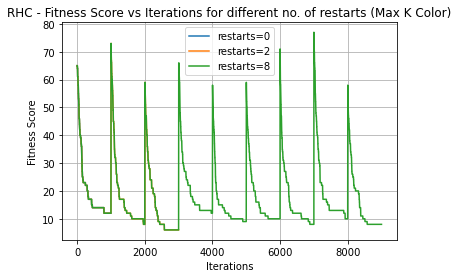

In [49]:
fig, axes = plt.subplots()


plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="restarts=0")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==2]["Fitness"].values, label="restarts=2")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==8]["Fitness"].values, label="restarts=8")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("RHC - Fitness Score vs Iterations for different no. of restarts ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Simulated Annealing

In [50]:
sa = SARunner(problem=problem,
              experiment_name='sa_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              temperature_list=[0.01, 0.1, 1, 10],
              )

# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [51]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000269,65.0,0.0,0.01,1000
1,1,0.004457,65.0,1.0,0.01,1000
2,2,0.004576,65.0,2.0,0.01,1000
3,3,0.004769,65.0,4.0,0.01,1000
4,4,0.005016,65.0,6.0,0.01,1000
...,...,...,...,...,...,...
3999,996,0.355924,6.0,1339.0,10,1000
4000,997,0.356452,6.0,1340.0,10,1000
4001,998,0.357040,6.0,1341.0,10,1000
4002,999,0.357570,6.0,1343.0,10,1000


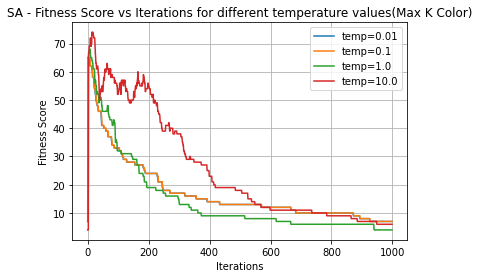

In [52]:
fig, axes = plt.subplots()


plt.plot(sa_run_curves["Fitness"][:1000].values, label="temp=0.01")
plt.plot(sa_run_curves["Fitness"][1000:2000].values, label="temp=0.1")
plt.plot(sa_run_curves["Fitness"][2000:3000].values, label="temp=1.0")
plt.plot(sa_run_curves["Fitness"][3000:4000].values, label="temp=10.0")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("SA - Fitness Score vs Iterations for different temperature values({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Genetic Algorithm

In [53]:
ga = GARunner(problem=problem,
              experiment_name='ga_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5**i for i in range(1,4)],
              mutation_rates=[0.1*i for i in range(1,10,3)]
              )

# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [54]:
ga_run_stats.sort_values(by="Fitness")

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
17,1000,1.0,126154,16.570712,"[2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, ...",125,0.7,1000
9,1000,1.0,24424,3.310155,"[1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, ...",25,0.4,1000
11,1000,2.0,25070,3.454208,"[0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, ...",25,0.7,1000
15,1000,3.0,113043,14.653114,"[2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, ...",125,0.4,1000
5,1000,3.0,6047,0.982859,"[2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, ...",5,0.7,1000
13,1000,3.0,85198,10.853905,"[2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, ...",125,0.1,1000
7,1000,9.0,26057,3.515980,"[0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, ...",25,0.1,1000
3,1000,10.0,6042,0.975122,"[2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, ...",5,0.4,1000
1,1000,20.0,6029,0.975757,"[2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, ...",5,0.1,1000
14,0,65.0,125,0.014537,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",125,0.4,1000


In [55]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000913,65.0,5.0,5,0.1,1000
1,1,0.006140,54.0,12.0,5,0.1,1000
2,2,0.006895,54.0,18.0,5,0.1,1000
3,3,0.007728,53.0,25.0,5,0.1,1000
4,4,0.008460,53.0,31.0,5,0.1,1000
...,...,...,...,...,...,...,...
8474,996,0.970849,1.0,125650.0,125,0.7,1000
8475,997,0.972069,1.0,125776.0,125,0.7,1000
8476,998,0.973277,1.0,125902.0,125,0.7,1000
8477,999,0.974572,1.0,126028.0,125,0.7,1000


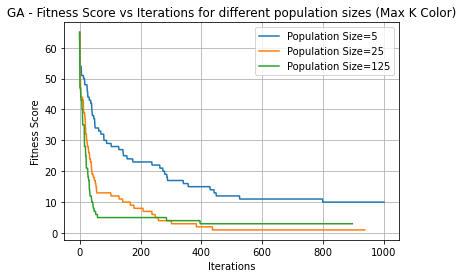

In [56]:
fig, axes = plt.subplots()

plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==5) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=5")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==25) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=25")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=125")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different population sizes ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

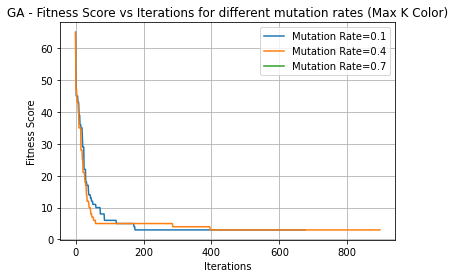

In [57]:
fig, axes = plt.subplots()


plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.1)]["Fitness"].values, label="Mutation Rate=0.1")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Mutation Rate=0.4")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.7)]["Fitness"].values, label="Mutation Rate=0.7")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different mutation rates ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## MIMIC

In [58]:
mimic = MIMICRunner(problem=problem,
              experiment_name='mimic_ff',
              output_directory="results", # note: specify an output directory to have results mimicved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5, 10, 50],
              keep_percent_list=[0.1, 0.3, 0.5],
              use_fast_mimic=True
              )

# the two data frames will contain the results
mimic_run_stats, mimic_run_curves = mimic.run()

In [59]:
mimic_run_stats

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,65.0,5,0.000936,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",True,5,0.1,1000
1,1000,54.0,3012,10.913782,"[2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,5,0.1,1000
2,0,65.0,5,0.000680,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",True,5,0.3,1000
3,1000,54.0,3012,10.901149,"[2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,5,0.3,1000
4,0,65.0,5,0.000697,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",True,5,0.5,1000
5,1000,54.0,3012,10.877012,"[2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,5,0.5,1000
6,0,65.0,10,0.001392,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",True,10,0.1,1000
7,1000,54.0,5522,11.651199,"[2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,10,0.1,1000
8,0,65.0,10,0.001149,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, ...",True,10,0.3,1000
9,1000,54.0,5522,11.643780,"[2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,10,0.3,1000


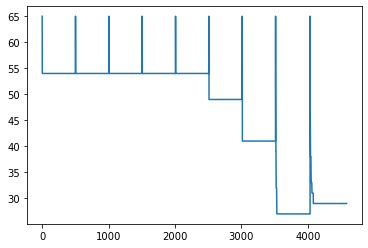

In [60]:
plt.plot(mimic_run_curves["Fitness"])

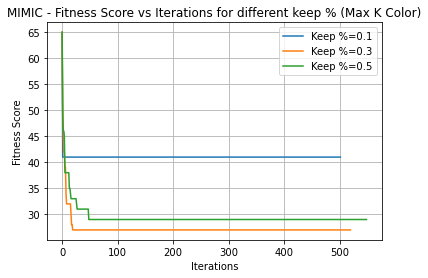

In [61]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.1)]["Fitness"].values, label="Keep %=0.1")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.3)]["Fitness"].values, label="Keep %=0.3")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Keep %=0.5")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different keep % ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

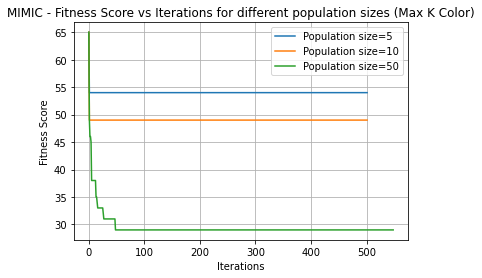

In [62]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==5) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=5")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==10) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=10")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=50")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different population sizes ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Comparing Algorithms

In [63]:
rhc_run_stats["algo"] = "rhc"
sa_run_stats["algo"] = "sa"
ga_run_stats["algo"] = "ga"
mimic_run_stats["algo"] = "mimic"

df = rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats))).dropna(axis=1)
df = df[df["Iteration"]!=0]
df

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,12.0,1036,0.342848,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
3,1000,12.0,1036,0.337425,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
5,1000,8.0,2086,1.153827,"[2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, ...",1000,rhc
7,1000,6.0,3128,2.425053,"[0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, ...",1000,rhc
9,1000,12.0,1036,0.354443,"[0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, ...",1000,rhc
11,1000,8.0,2086,1.189374,"[2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, ...",1000,rhc
13,1000,6.0,3128,2.470346,"[0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, ...",1000,rhc
15,1000,12.0,4170,4.225353,"[0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, ...",1000,rhc
17,1000,9.0,5206,6.430862,"[1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, ...",1000,rhc
19,1000,10.0,6242,9.080196,"[1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, ...",1000,rhc


### Fitness Score vs Iterations

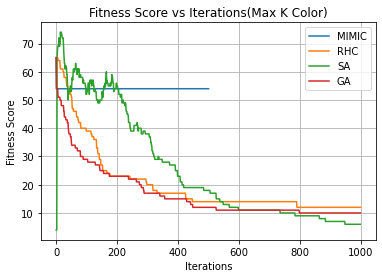

In [64]:
fig, axes = plt.subplots()

plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==5) & (mimic_run_curves["Keep Percent"]==0.1)]["Fitness"].values, label="MIMIC")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="RHC")
plt.plot(sa_run_curves["Fitness"][3000:4000].values, label="SA")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==5) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="GA")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("Fitness Score vs Iterations({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

In [65]:
df.groupby("algo").max("Fitness")["Fitness"]

algo
ga       20.0
mimic    54.0
rhc      12.0
sa        7.0
Name: Fitness, dtype: float64

### Wall Clock Time

In [66]:
df.groupby("algo").sum("Time")["Time"]

algo
ga        55.291811
mimic    127.642943
rhc       75.757412
sa         1.450824
Name: Time, dtype: float64

### Time per iteration

In [67]:
df.groupby("algo").mean("Time")["Time"]

algo
ga        6.143535
mimic    14.182549
rhc       5.827493
sa        0.362706
Name: Time, dtype: float64

### Iterations taken to converge

In [68]:
df.groupby("algo").max("Fitness")

,Iteration,Fitness,FEvals,Time,max_iters
algo,,,,,
ga,1000,20.0,126154,16.570712,1000
mimic,1000,54.0,28008,21.848542,1000
rhc,1000,12.0,9374,19.808024,1000
sa,1000,7.0,1344,0.378319,1000


### Fitness vs Size of Problem

In [69]:
df_size = pd.DataFrame()

for size in [5, 25, 125]:
    problem = MaxKColorGenerator().generate(seed=27, number_of_nodes=size, max_connections_per_node=int(np.sqrt(size)), max_colors=int(np.sqrt(size)))
    
    rhc = RHCRunner(
              problem=problem,
              experiment_name='rhc_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              restart_list=[0]
        )


    rhc_run_stats, rhc_run_curves = rhc.run()
    
    sa = SARunner(problem=problem,
              experiment_name='sa_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              temperature_list=[10],
              )

    # the two data frames will contain the results
    sa_run_stats, sa_run_curves = sa.run()
    
    ga = GARunner(problem=problem,
              experiment_name='ga_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5],
              mutation_rates=[0.4]
              )

    # the two data frames will contain the results
    ga_run_stats, ga_run_curves = ga.run()
    
    mimic = MIMICRunner(problem=problem,
              experiment_name='mimic_ff_size',
              output_directory="results", # note: specify an output directory to have results mimicved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5],
              keep_percent_list=[0.1],
              use_fast_mimic=True
              )

    # the two data frames will contain the results
    mimic_run_stats, mimic_run_curves = mimic.run()
    
    rhc_run_stats["algo"] = "rhc"
    sa_run_stats["algo"] = "sa"
    ga_run_stats["algo"] = "ga"
    mimic_run_stats["algo"] = "mimic"

    df_size = df_size.append(rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats)))).dropna(axis=1)
    df_size = df_size[df_size["Iteration"]!=0]

In [70]:
df_size

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,2.0,500,0.079591,"[1, 0, 0, 1, 0]",1000,rhc
1,1000,1.0,1137,0.215569,"[1, 1, 0, 0, 0]",1000,sa
1,1000,1.0,3012,0.214939,"[0, 0, 1, 1, 1]",1000,ga
1,1000,1.0,3012,1.076084,"[0.0, 0.0, 1.0, 1.0, 1.0]",1000,mimic
1,1000,1.0,589,0.112038,"[4, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 4, 2, ...",1000,rhc
1,1000,0.0,677,0.085573,"[2, 2, 2, 1, 3, 4, 1, 4, 3, 4, 4, 4, 2, 1, 4, ...",1000,sa
1,1000,0.0,1204,0.109445,"[2, 3, 0, 4, 1, 2, 0, 1, 3, 1, 1, 1, 4, 2, 0, ...",1000,ga
1,1000,12.0,3012,4.418839,"[4.0, 3.0, 0.0, 3.0, 1.0, 1.0, 4.0, 1.0, 3.0, ...",1000,mimic
1,1000,1.0,1033,0.528109,"[9, 2, 8, 8, 0, 5, 8, 9, 1, 8, 7, 1, 10, 1, 3,...",1000,rhc
1,1000,1.0,1527,0.672112,"[2, 5, 8, 3, 9, 1, 8, 7, 2, 6, 0, 10, 2, 4, 10...",1000,sa


In [71]:
df_small = df_size[:4]
df_medium = df_size[4:8]
df_big = df_size[8:]

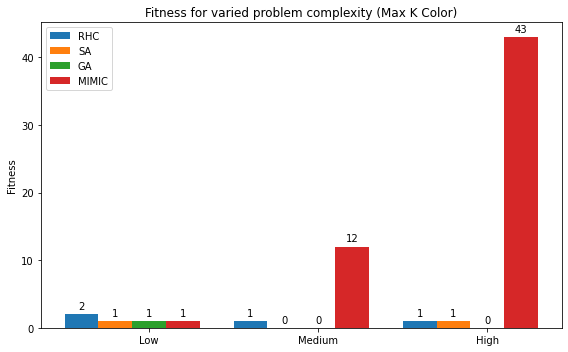

In [74]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Fitness"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Fitness"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Fitness"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Fitness"], width, label='MIMIC')


# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Fitness for varied problem complexity ({})'.format(problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Low", "Medium", "High"])
ax.legend()

ax.bar_label(rhc, padding=3)
ax.bar_label(sa, padding=3)
ax.bar_label(ga, padding=3)
ax.bar_label(mimic, padding=3)

fig.tight_layout()

plt.show()

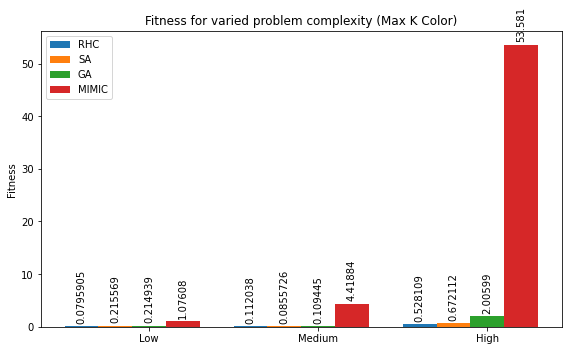

In [75]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Time"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Time"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Time"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Time"], width, label='MIMIC')


# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Fitness for varied problem complexity ({})'.format(problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Low", "Medium", "High"])
ax.legend()

ax.bar_label(rhc, padding=3, rotation=90)
ax.bar_label(sa, padding=3, rotation=90)
ax.bar_label(ga, padding=3, rotation=90)
ax.bar_label(mimic, padding=3, rotation=90)

fig.tight_layout()

plt.show()